Random Forest

Dataset Description:

Use the Glass dataset and apply the Random forest model.

1. Exploratory Data Analysis (EDA):

Perform exploratory data analysis to understand the structure of the dataset.
Check for missing values, outliers, inconsistencies in the data.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('glass.csv')
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(999, 10)

In [5]:
#checking missing values
data.isnull().sum()

,0
RI,785
Na,785
Mg,785
Al,785
Si,785
K,785
Ca,785
Ba,785
Fe,785
Type,785


In [6]:
#chechking the duplicates of the data
data.duplicated().sum()

np.int64(785)

In [7]:
#drop duplicates
data.drop_duplicates(inplace=True)

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
data.isnull().sum()

,0
RI,1
Na,1
Mg,1
Al,1
Si,1
K,1
Ca,1
Ba,1
Fe,1
Type,1


In [10]:
data.dtypes

,0
RI,float64
Na,float64
Mg,float64
Al,float64
Si,float64
K,float64
Ca,float64
Ba,float64
Fe,float64
Type,float64


In [11]:
#filling the null values
for col in data.columns:
  data[col]=data[col].fillna(data[col].mean())

In [12]:
data.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [13]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003026,0.814743,1.440298,0.494760,0.772179,0.651650,1.422531,0.497074,0.097360,2.100182
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.290000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.365000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519140,13.807500,3.600000,1.630000,73.087500,0.610000,9.147500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 0 to 214
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    float64
dtypes: float64(10)
memory usage: 18.4 KB


In [15]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.521010,13.640000,4.490000,1.100000,71.78000,0.060000,8.750000,0.000000,0.000000,1.000000
1,1.517610,13.890000,3.600000,1.360000,72.73000,0.480000,7.830000,0.000000,0.000000,1.000000
2,1.516180,13.530000,3.550000,1.540000,72.99000,0.390000,7.780000,0.000000,0.000000,1.000000
3,1.517660,13.210000,3.690000,1.290000,72.61000,0.570000,8.220000,0.000000,0.000000,1.000000
4,1.517420,13.270000,3.620000,1.240000,73.08000,0.550000,8.070000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...
210,1.516850,14.920000,0.000000,1.990000,73.06000,0.000000,8.400000,1.590000,0.000000,7.000000
211,1.520650,14.360000,0.000000,2.020000,73.42000,0.000000,8.440000,1.640000,0.000000,7.000000
212,1.516510,14.380000,0.000000,1.940000,73.61000,0.000000,8.480000,1.570000,0.000000,7.000000
213,1.517110,14.230000,0.000000,2.080000,73.36000,0.000000,8.620000,1.670000,0.000000,7.000000


In [16]:
#checking the unique values
for col in data.columns:
  print(col)
  print(data[col].unique())

RI
[1.52101    1.51761    1.51618    1.51766    1.51742    1.51596
 1.51743    1.51756    1.51918    1.51755    1.51571    1.51763
 1.51589    1.51748    1.51784    1.52196    1.51911    1.51735
 1.5175     1.51966    1.51736    1.51751    1.5172     1.51764
 1.51793    1.51721    1.51768    1.51747    1.51775    1.51753
 1.51783    1.51567    1.51909    1.51797    1.52213    1.51779
 1.5221     1.51786    1.519      1.51869    1.52667    1.52223
 1.51898    1.5232     1.51926    1.51808    1.51837    1.51778
 1.51769    1.51215    1.51824    1.51754    1.51905    1.51977
 1.52172    1.52227    1.52099    1.52152    1.523      1.51574
 1.51848    1.51593    1.51631    1.5159     1.51645    1.51627
 1.51613    1.51592    1.51646    1.51594    1.51409    1.51625
 1.51569    1.5164     1.51841    1.51605    1.51588    1.51629
 1.5186     1.51689    1.51811    1.51655    1.5173     1.5182
 1.52725    1.5241     1.52475    1.53125    1.53393    1.52222
 1.51818    1.52664    1.52739    1.52

2: Data Visualization:

Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.

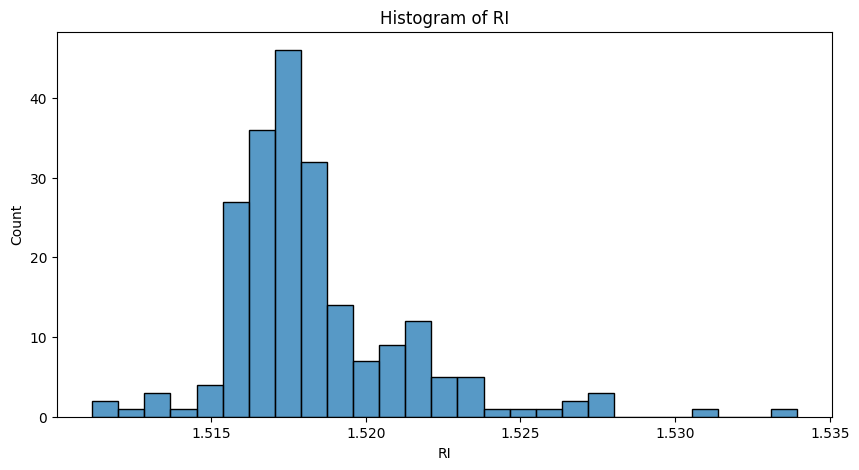

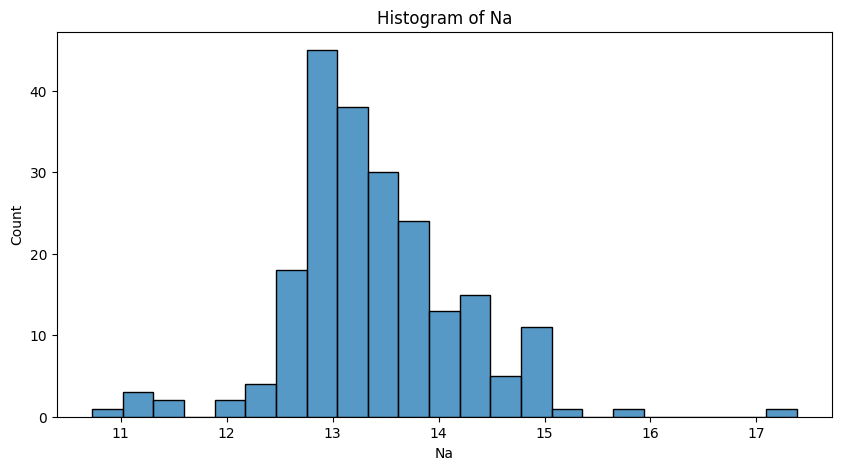

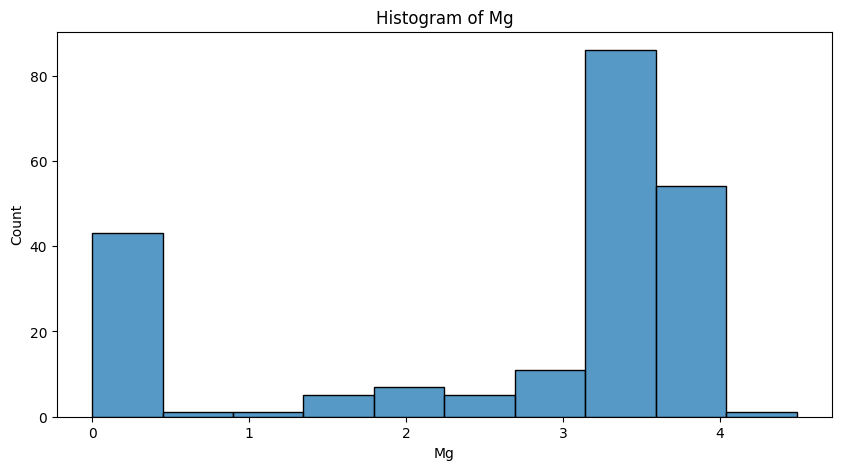

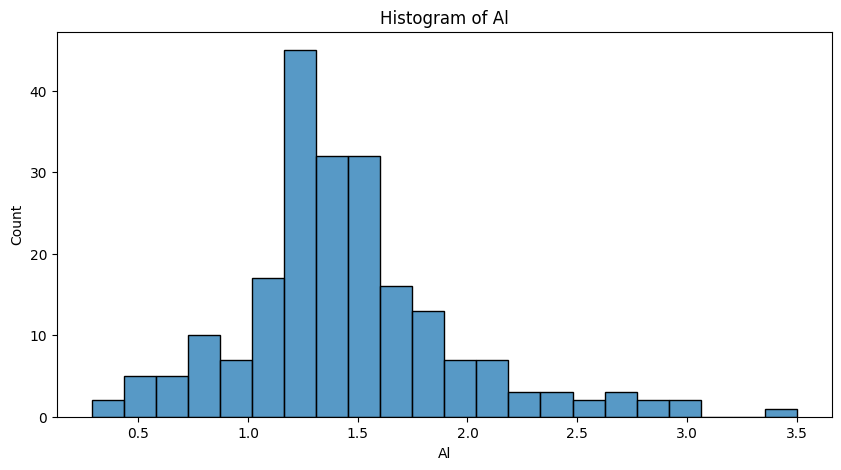

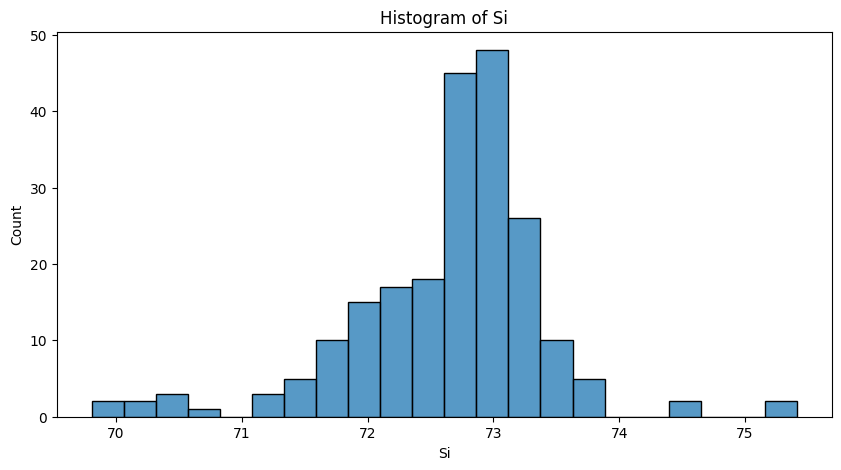

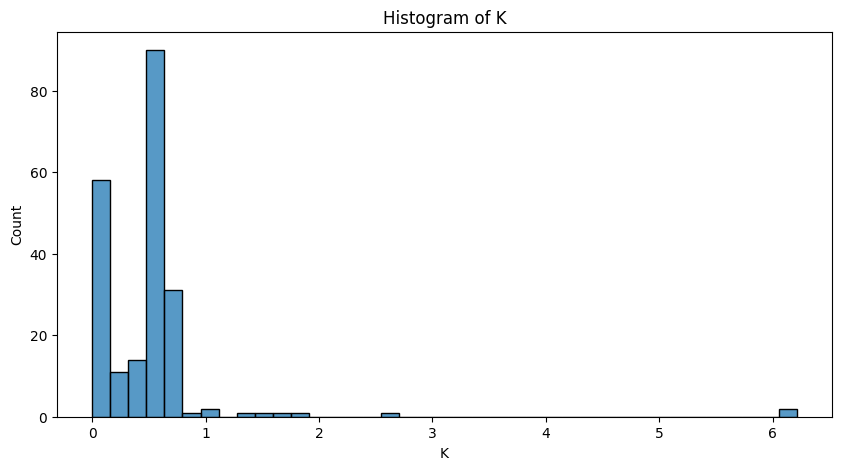

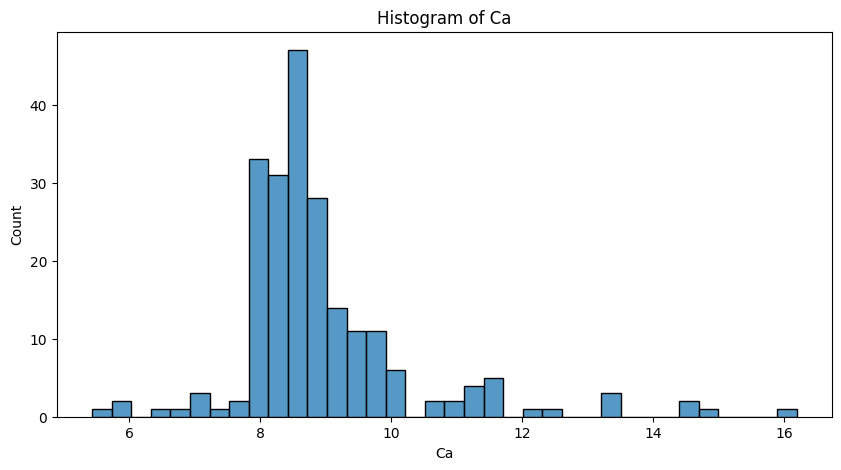

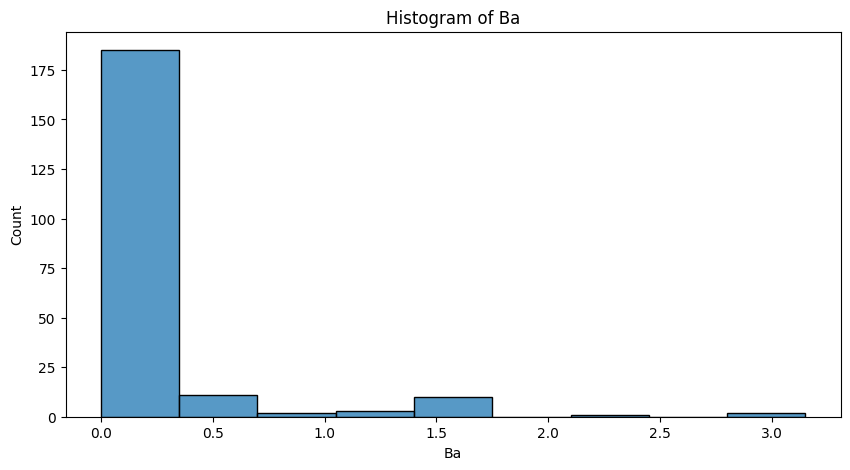

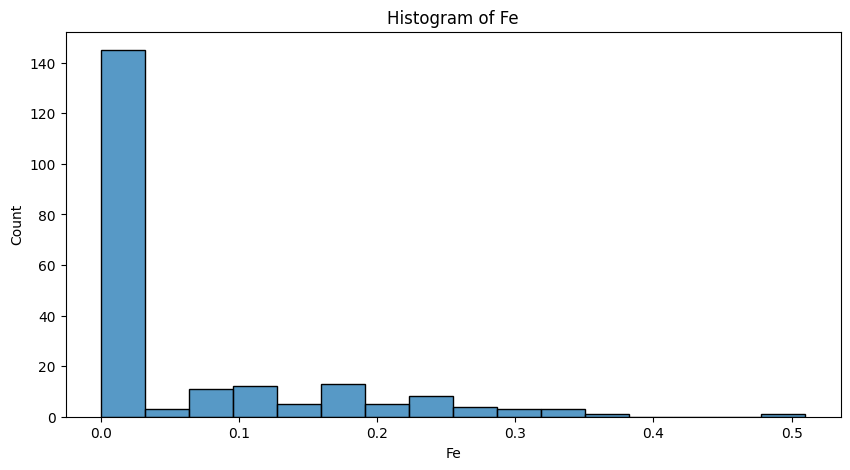

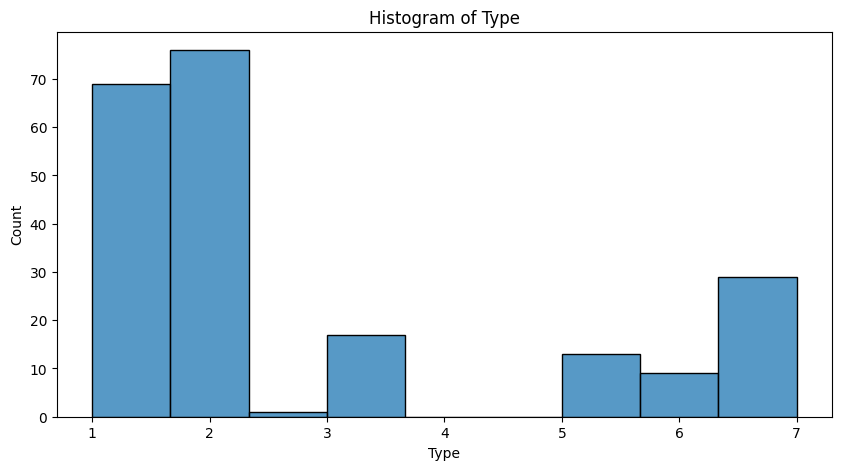

In [17]:
#histograms
for col in data.columns:
  plt.figure(figsize=(10,5))
  sns.histplot(data[col])
  plt.title(f"Histogram of {col}")
  plt.show()

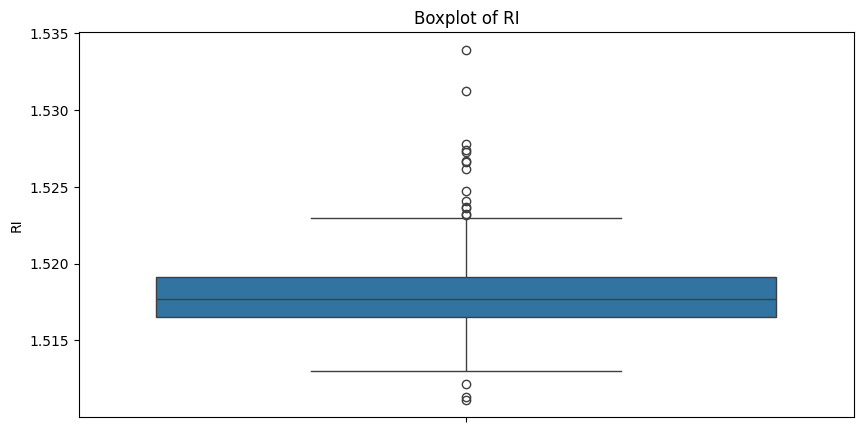

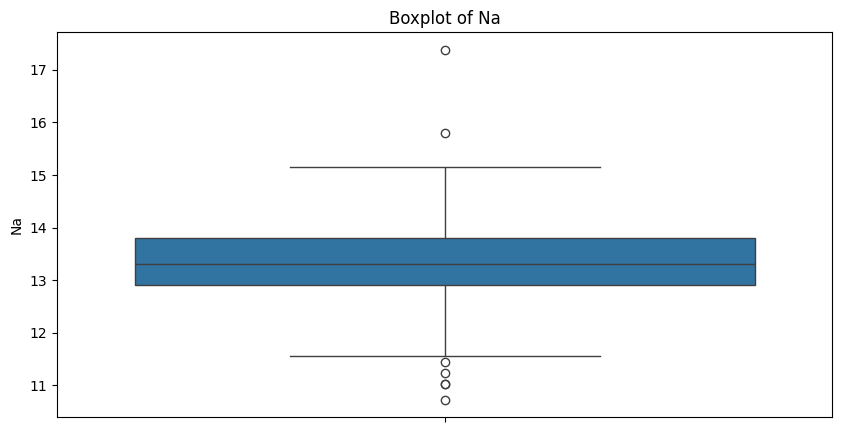

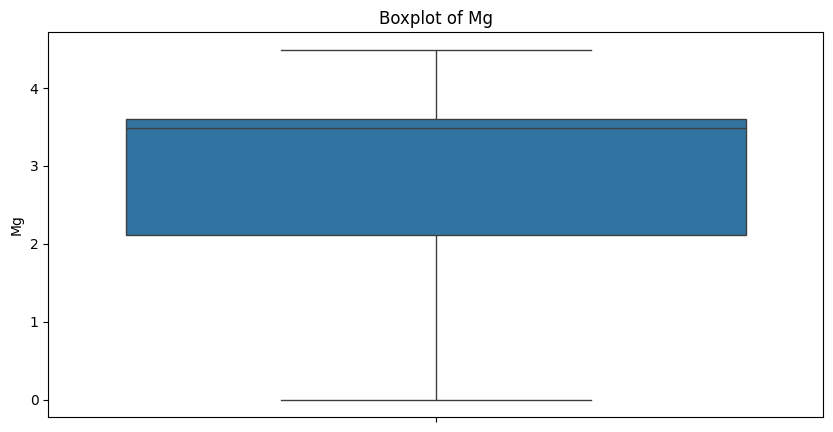

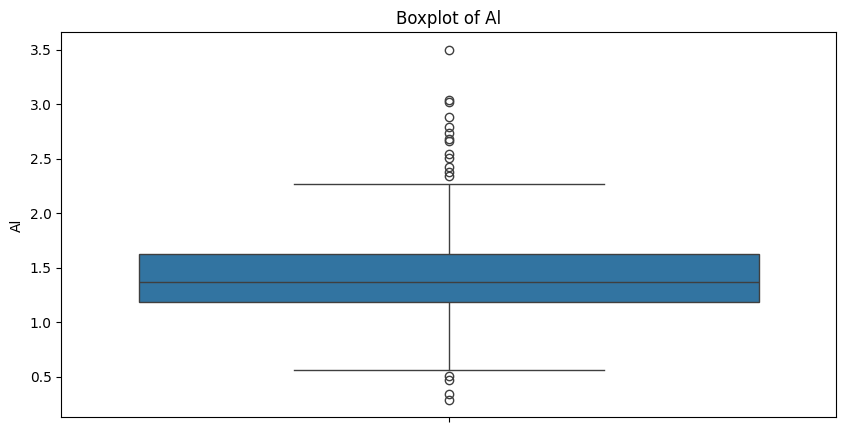

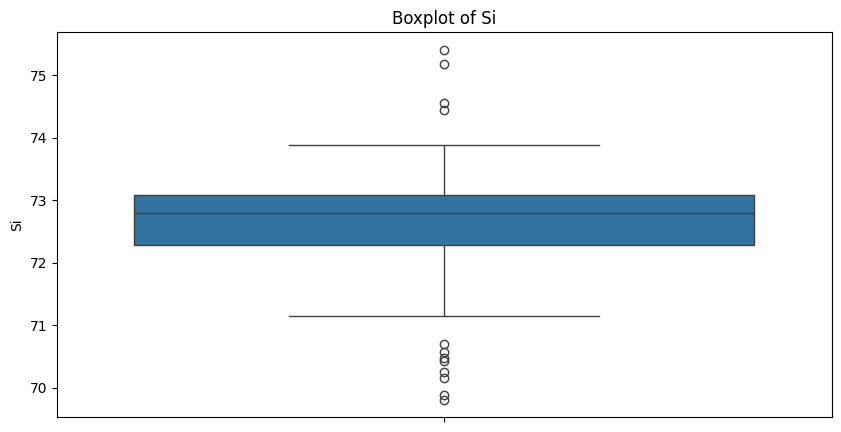

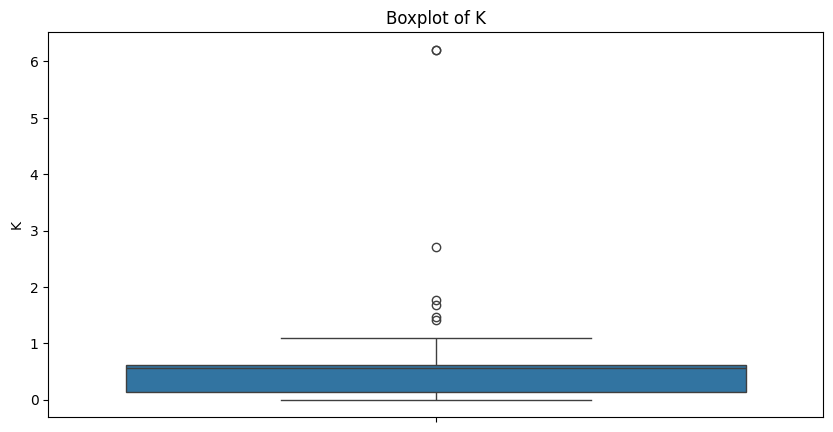

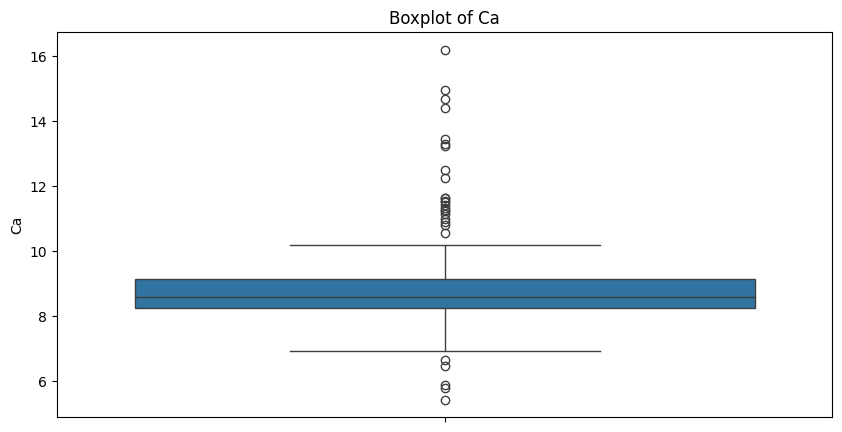

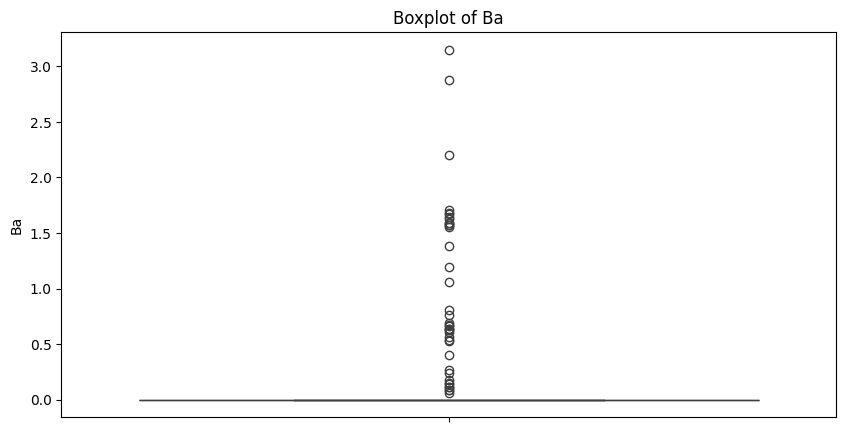

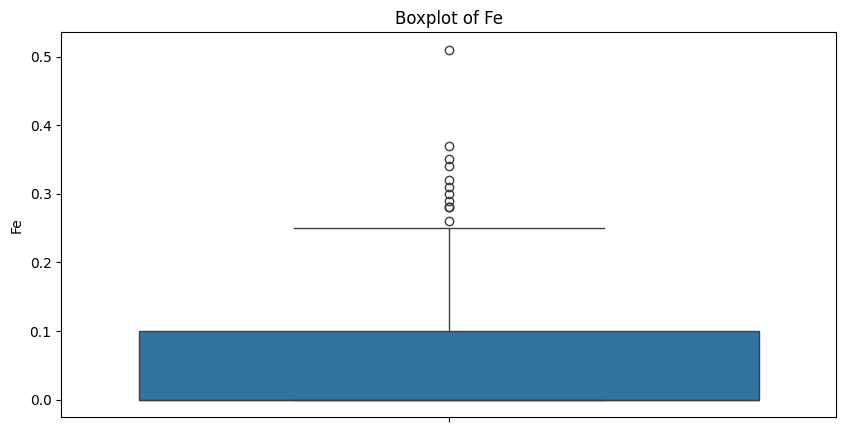

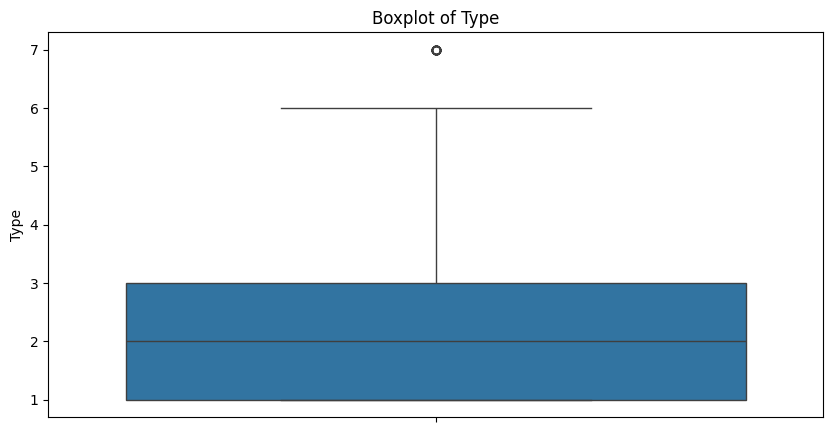

In [18]:
#boxplot
for col in data.columns:
  plt.figure(figsize=(10,5))
  sns.boxplot(data[col])
  plt.title(f"Boxplot of {col}")
  plt.show()

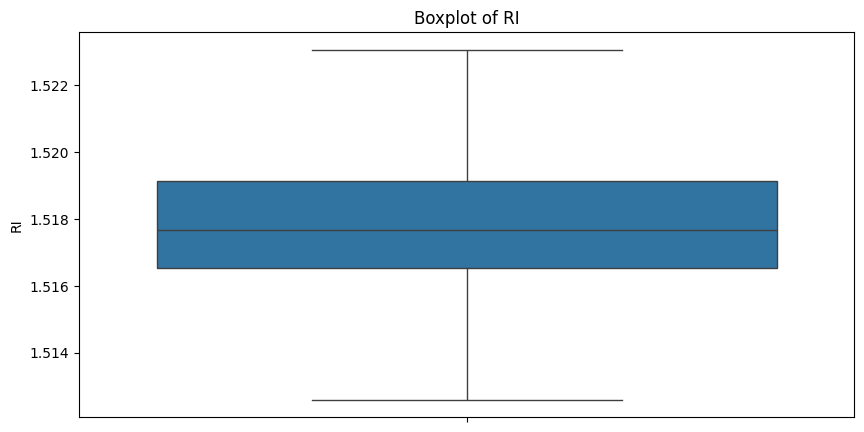

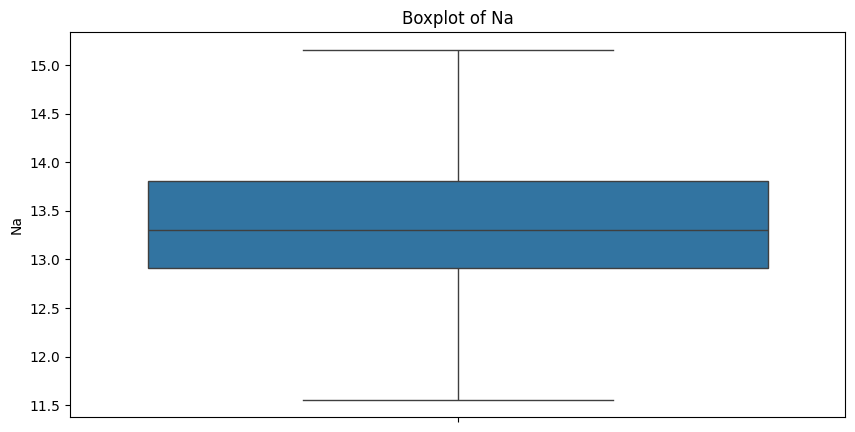

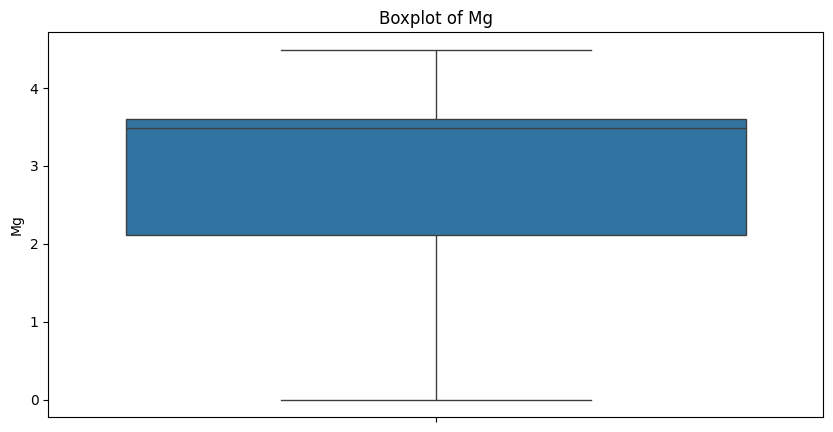

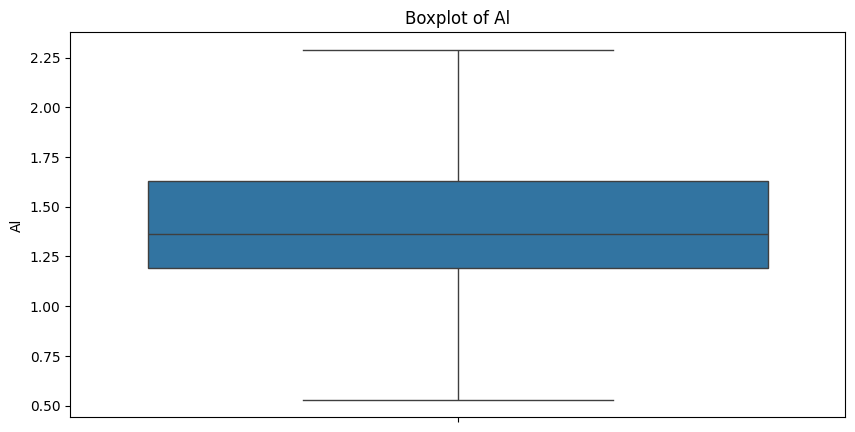

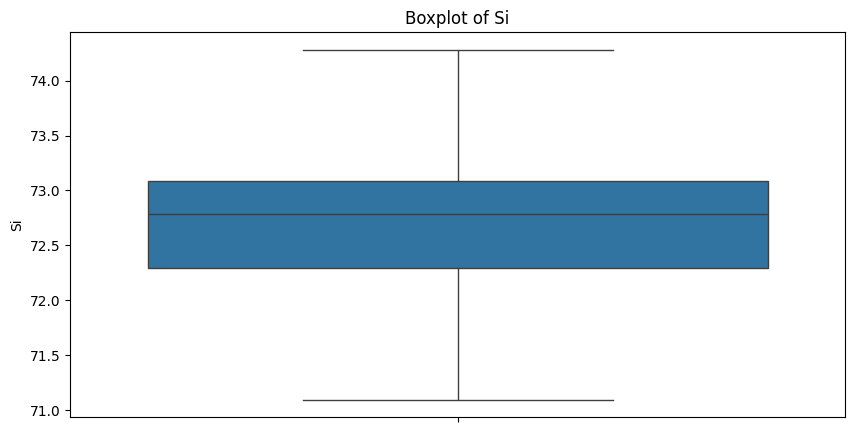

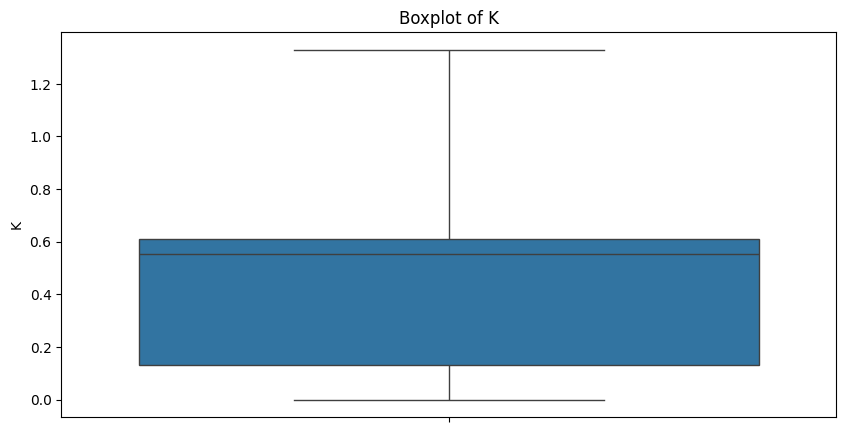

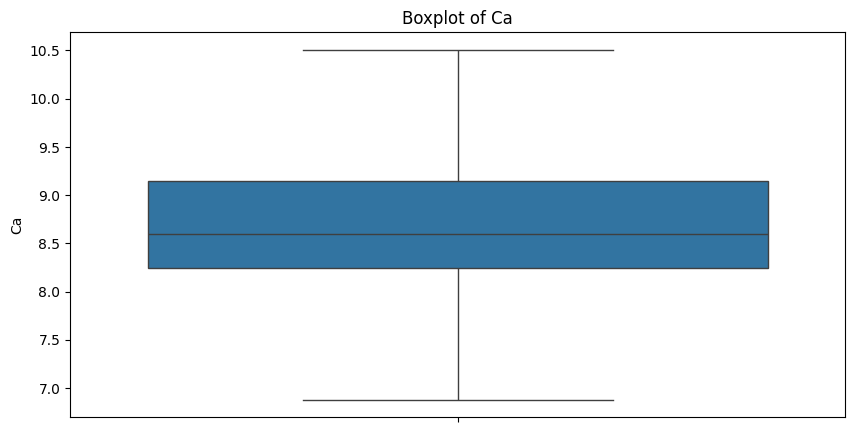

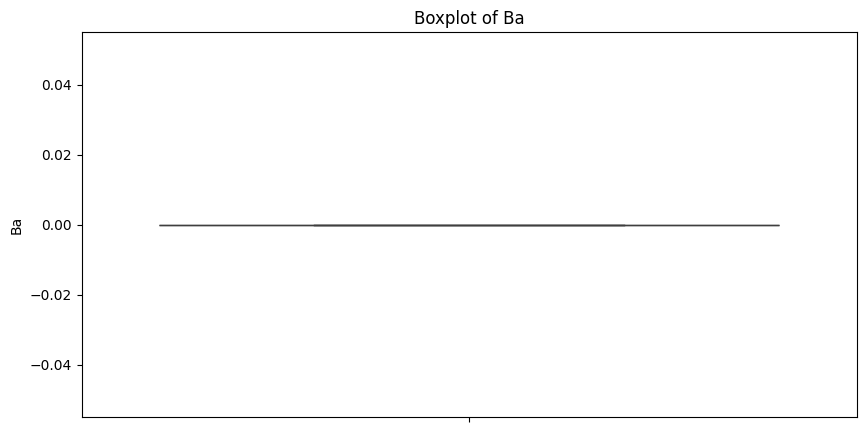

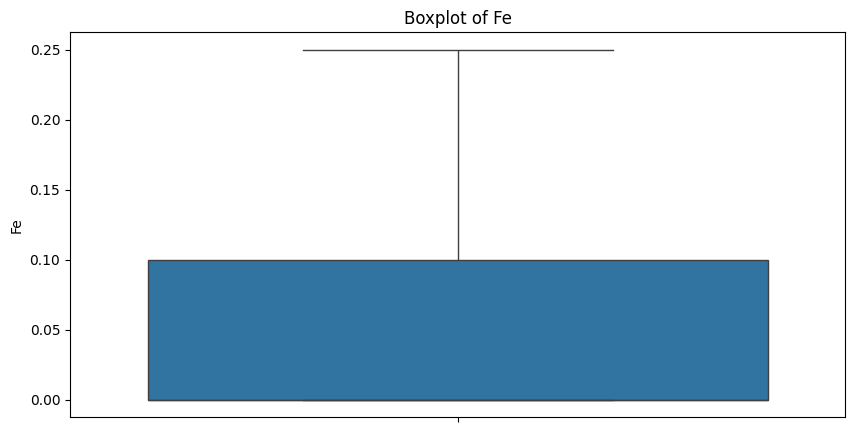

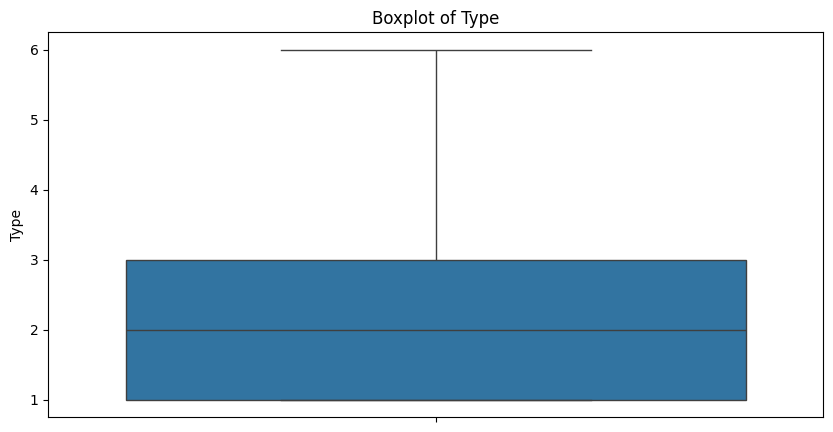

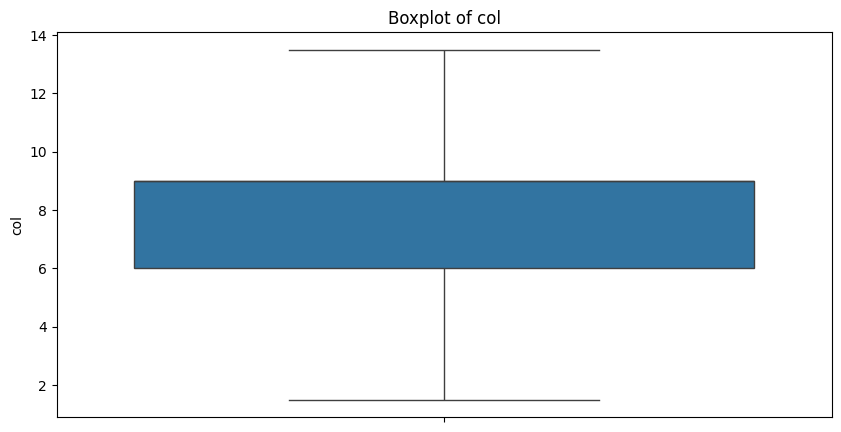

In [ ]:
#detecting the outliers with percentile method
for col in data.columns:
  q1=data[col].quantile(0.25)
  q3=data[col].quantile(0.75)
  iqr=q3-q1
  ue=q3+1.5*iqr
  le=q1-1.5*iqr
  data[col].apply(lambda x: ue if x > ue else (le if x < le else x))
  plt.figure(figsize=(10,5))
  sns.boxplot(data[col])
  plt.title(f"Boxplot of {col}")
  plt.show()

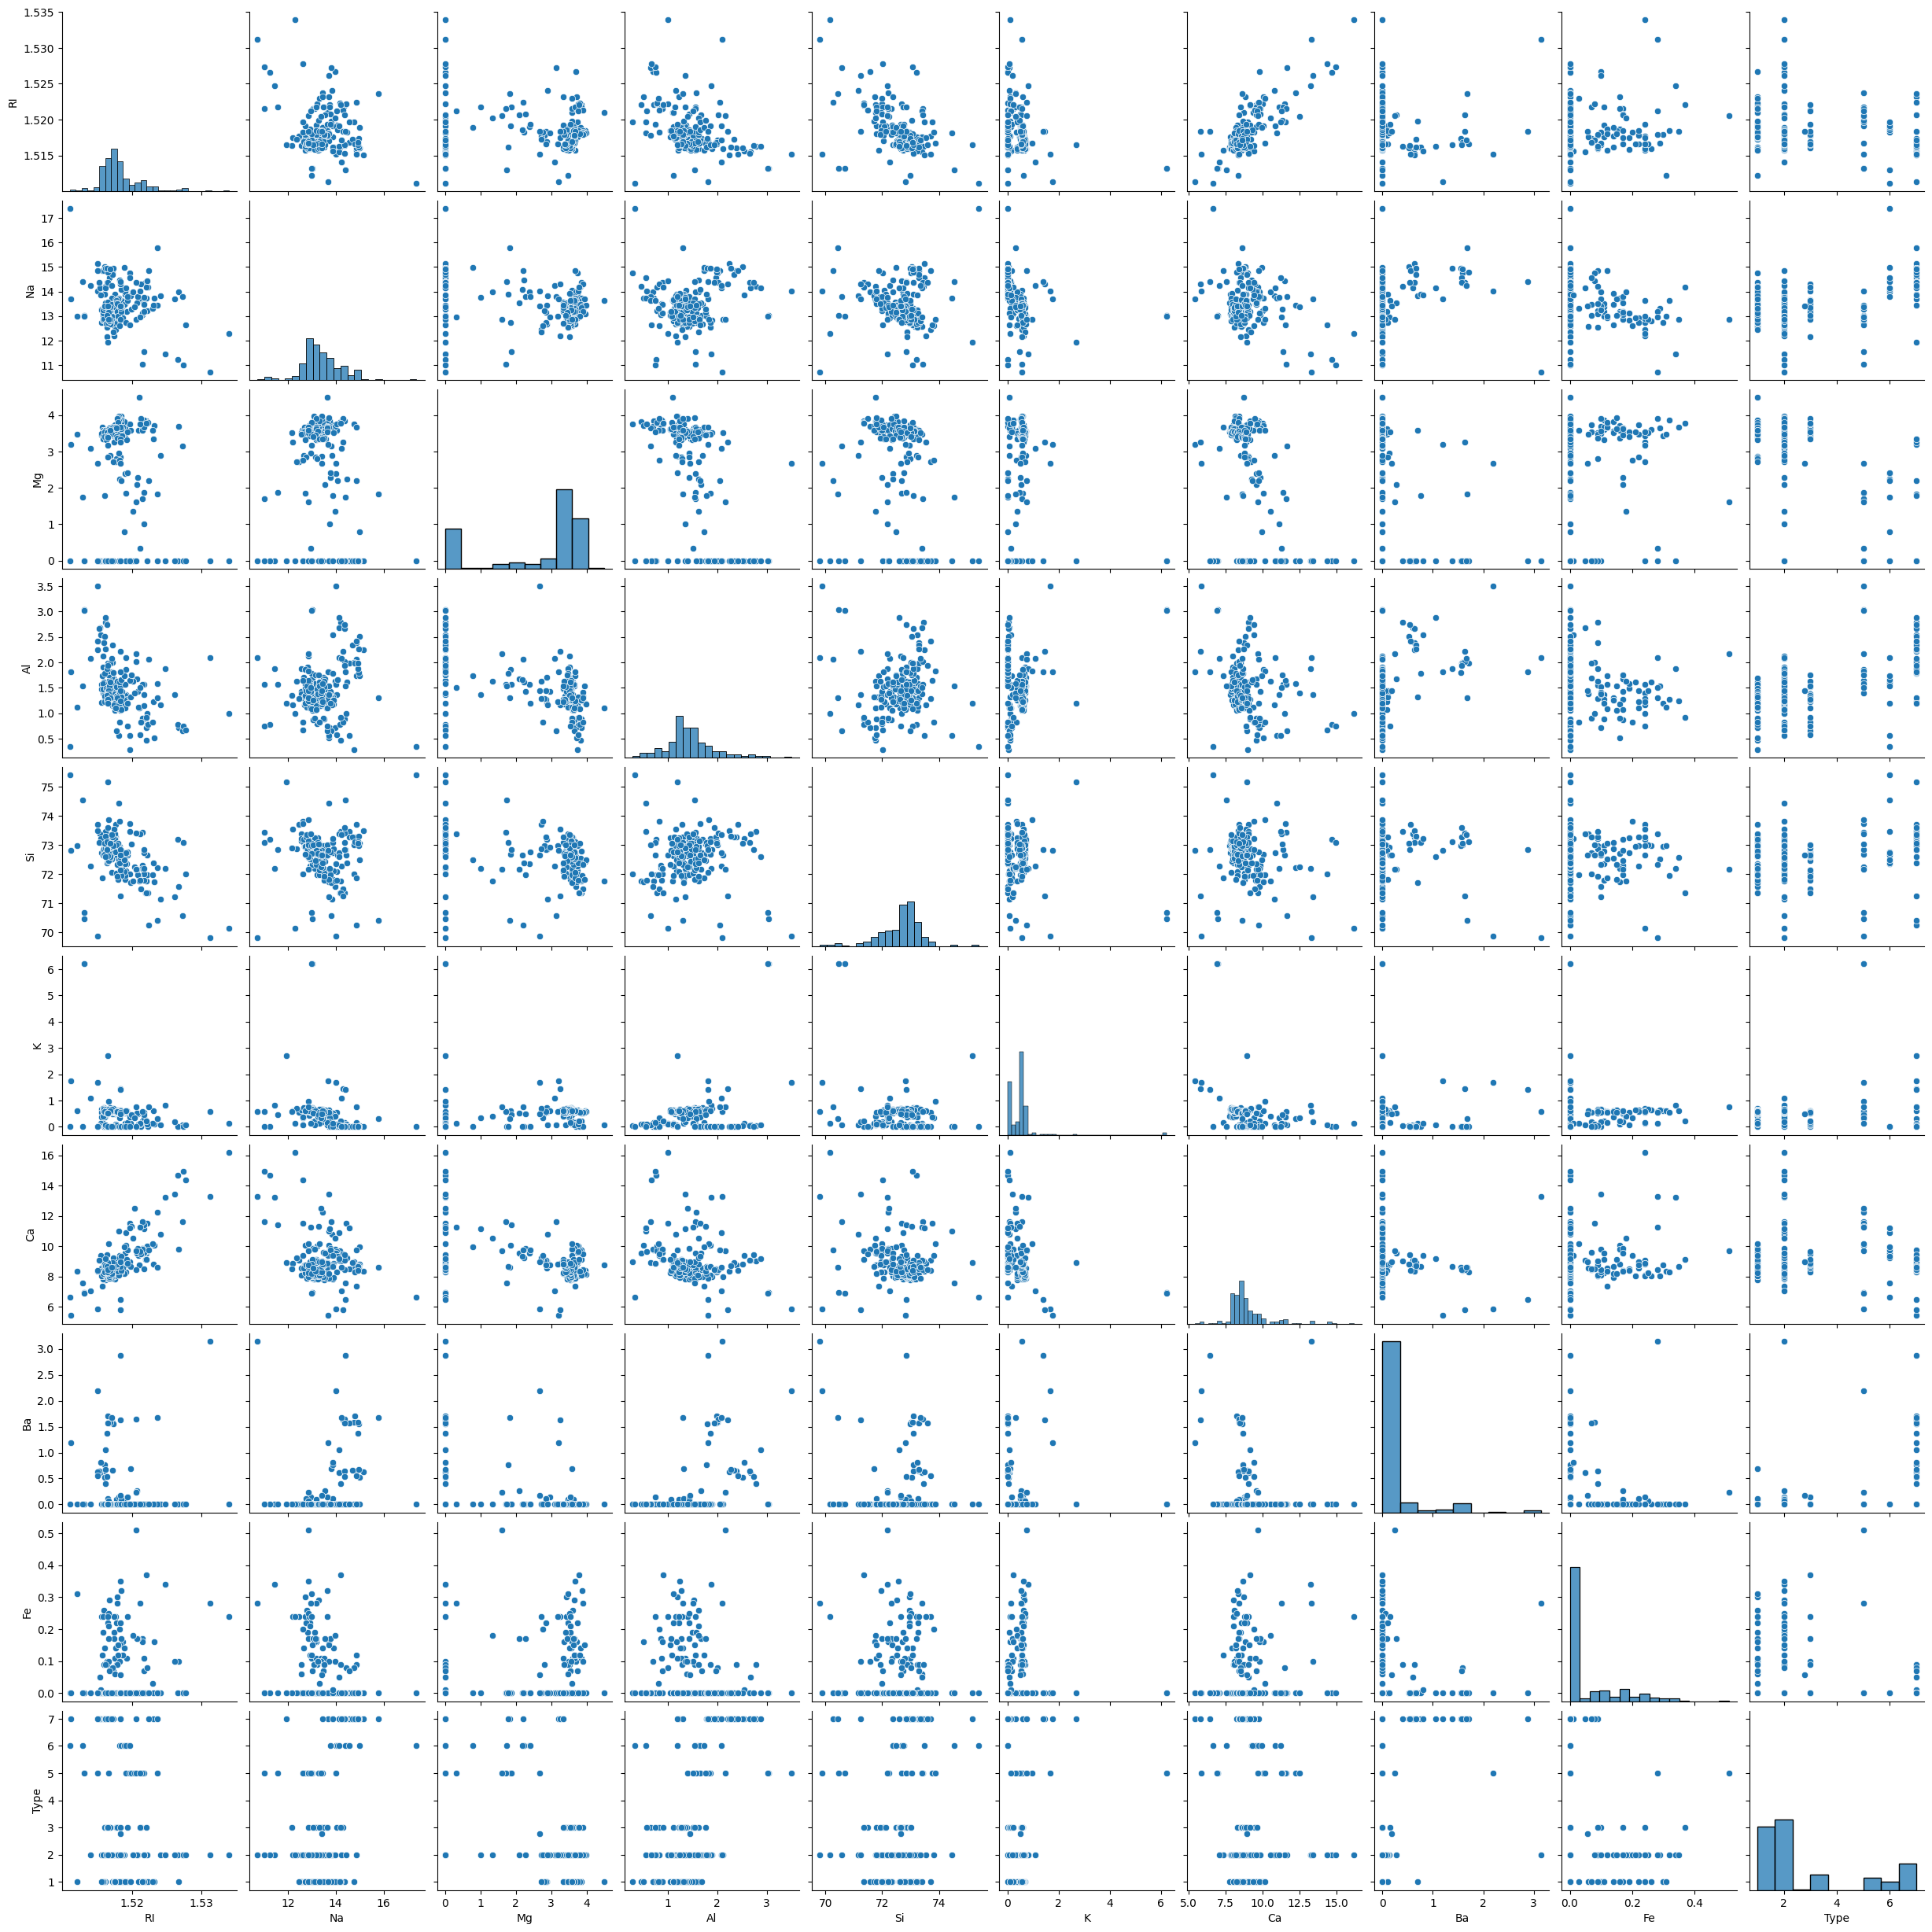

In [19]:
#pairplot
sns.pairplot(data)

3: Data Preprocessing

1. Check for missing values in the dataset and decide on a strategy for handling them.Implement the chosen strategy (e.g., imputation or removal) and explain your reasoning.
2. If there are categorical variables, apply encoding techniques like one-hot encoding to convert them into numerical format.
3. Apply feature scaling techniques such as standardization or normalization to ensure that all features are on a similar scale. Handling the imbalance data.


In [ ]:
data.drop('col', axis=1, inplace=True)

In [22]:
data.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


we dont have any missing values in the data

In [ ]:
data.dtypes

,0
RI,float64
Na,float64
Mg,float64
Al,float64
Si,float64
K,float64
Ca,float64
Ba,float64
Fe,float64
Type,float64


In [23]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.521010,13.640000,4.490000,1.100000,71.78000,0.060000,8.750000,0.000000,0.000000,1.000000
1,1.517610,13.890000,3.600000,1.360000,72.73000,0.480000,7.830000,0.000000,0.000000,1.000000
2,1.516180,13.530000,3.550000,1.540000,72.99000,0.390000,7.780000,0.000000,0.000000,1.000000
3,1.517660,13.210000,3.690000,1.290000,72.61000,0.570000,8.220000,0.000000,0.000000,1.000000
4,1.517420,13.270000,3.620000,1.240000,73.08000,0.550000,8.070000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...
210,1.516850,14.920000,0.000000,1.990000,73.06000,0.000000,8.400000,1.590000,0.000000,7.000000
211,1.520650,14.360000,0.000000,2.020000,73.42000,0.000000,8.440000,1.640000,0.000000,7.000000
212,1.516510,14.380000,0.000000,1.940000,73.61000,0.000000,8.480000,1.570000,0.000000,7.000000
213,1.517110,14.230000,0.000000,2.080000,73.36000,0.000000,8.620000,1.670000,0.000000,7.000000


we dont need to use any encoding techniques in this because there are no categorical columns in the data

In the above dataset we doesnt using any preprocessing techniques like normalization and standardization. because in this we are performing the random forest so random forest doesnt need any scaling techniques. because it is a tree based model and if we scale the data also it will not improve the performance

4: Random Forest Model Implementation
1. Divide the data into train and test split.
2. Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
3. Train the model on the train dataset. Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.


In [24]:
from sklearn.model_selection import train_test_split

X=data.drop('Type',axis=1)
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.521010,13.640000,4.490000,1.100000,71.78000,0.060000,8.750000,0.000000,0.000000
1,1.517610,13.890000,3.600000,1.360000,72.73000,0.480000,7.830000,0.000000,0.000000
2,1.516180,13.530000,3.550000,1.540000,72.99000,0.390000,7.780000,0.000000,0.000000
3,1.517660,13.210000,3.690000,1.290000,72.61000,0.570000,8.220000,0.000000,0.000000
4,1.517420,13.270000,3.620000,1.240000,73.08000,0.550000,8.070000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
210,1.516850,14.920000,0.000000,1.990000,73.06000,0.000000,8.400000,1.590000,0.000000
211,1.520650,14.360000,0.000000,2.020000,73.42000,0.000000,8.440000,1.640000,0.000000
212,1.516510,14.380000,0.000000,1.940000,73.61000,0.000000,8.480000,1.570000,0.000000
213,1.517110,14.230000,0.000000,2.080000,73.36000,0.000000,8.620000,1.670000,0.000000


In [32]:
y=(data['Type']>2).astype(int)
y

,Type
0,0
1,0
2,0
3,0
4,0
...,...
210,1
211,1
212,1
213,1


In [34]:
y.unique()

array([0, 1])

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
max_features=int(np.sqrt(X.shape[1]))
Kfold=KFold(n_splits=10,random_state=42,shuffle=True)

model = RandomForestClassifier(n_estimators=100,max_features=max_features,random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(max_features=3, random_state=42)

In [44]:
y_pred=model.predict(X_test)

In [45]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1])

In [47]:
results=cross_val_score(model,X,y,cv=Kfold)

In [48]:
print(results.mean())

0.8504329004329005


In [49]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("accuracy score : ",accuracy_score(y_test,y_pred))
print("precision score : ",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("f1 score : ",f1_score(y_test,y_pred))



accuracy score :  0.9302325581395349
precision score :  0.9411764705882353
recall score :  0.8888888888888888
f1 score :  0.9142857142857143


5: Bagging and Boosting Methods
Apply the Bagging and Boosting methods and compare the results.


In [61]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

Kfold=KFold(n_splits=10,random_state=42,shuffle=True)
cart=DecisionTreeClassifier()
model_bagging=BaggingClassifier(cart,n_estimators=100,random_state=42)
model_bagging.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [62]:
y_pred=model_bagging.predict(X_test)

In [63]:
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1])

In [64]:
results=cross_val_score(model_bagging,X,y,cv=Kfold)

In [65]:
print(results.mean())

0.8595238095238095


In [66]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("accuracy score : ",accuracy_score(y_test,y_pred))
print("precision score : ",precision_score(y_test,y_pred))
print("recall score : ",recall_score(y_test,y_pred))
print("f1 score : ",f1_score(y_test,y_pred))



accuracy score :  0.9069767441860465
precision score :  0.8888888888888888
recall score :  0.8888888888888888
f1 score :  0.8888888888888888


In [68]:
#boosting
from sklearn.ensemble import AdaBoostClassifier
model_boosting=AdaBoostClassifier(n_estimators=100,learning_rate=0.1,random_state=42)
model_boosting.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

In [69]:
y_pred_boosting=model_boosting.predict(X_test)

In [70]:
y_pred_boosting

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [71]:
results=cross_val_score(model_boosting,X,y,cv=Kfold)

In [72]:
print(results.mean())

0.8456709956709958


In [73]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("accuracy score : ",accuracy_score(y_test,y_pred_boosting))
print("precision score : ",precision_score(y_test,y_pred_boosting))
print("recall score : ",recall_score(y_test,y_pred_boosting))
print("f1 score : ",f1_score(y_test,y_pred_boosting))



accuracy score :  0.8372093023255814
precision score :  1.0
recall score :  0.6111111111111112
f1 score :  0.7586206896551724


For this dataset we did both bagging and boosting techniques.we can see the accuracy score of the bagging(0.90) and boosting(0.83) for the given dataset glass the bagging model is the best beacuse it has high accuracy score

Additional Notes:
1. Explain Bagging and Boosting methods. How is it different from each other.
2. Explain how to handle imbalance in the data.

Bagging and boosying are ensemble techniques these are powerful methods in machine learning that combines multiple models to create a stronger and more accurate model

Bagging :
Bggging creats multiple independent models using randam sampling with replacement.it trains the model parallely and each model trained separately
it reduces the varinace and prevent overfitting
eg : random forest

Boosting :
it converts the homogeneous weak learners into strong learners. it trains the model squentially. each model focus on correcting the errors from the previous model. it reduces the bias
eg : XG Boost,AdaBoost and GradientBoosting


2.Imbalanced data means having classes like 90:10,85:6 etc. if we have not handled this data the model predicts the majority classes always

we use resampling techniques like oversampling and under sampling

give more importances to minority classes during training

some algorithms handles this imbalanced data easily like XGBoost,Random forest

if possible collect more minority samples

never use accuracy score use other scores like f1, recall, precision etc.


